In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.special as sp

In [10]:
%matplotlib inline

In [11]:
# Определение класса нейронной сети. C ф-циями инициализации, терировки, опросом(после работы трех слоев)
class neuralNetwork:

    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.innodes = inputnodes   # количество узлов входного слоя
        self.hnodes = hiddennodes   # количество узлов скрытого слоя 
        self.onodes = outputnodes   # количество узлов выходного слоя 
        
        self.lr = learningrate  # коэффициент обучения
        self.activation_function = lambda x : sp.expit(x) # функция активации(сигмоида)

        # Матрица связей коэф-ов wih (входной -> скрытый) и 
        # Матрица связей коэф-ов who (скрытый -> выходной)
        # Весовые коэффициенты связей между узлом i и узлом j следующего слоя обозначим как w_i_j
        # i     j     k
        # w11   w21   w31
        # w12   w22   w32
        # w13   w23   w33
        # Ниже мы задали:
        # матрица W весовых коэф. размерностью [hnodes X innodes]
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.innodes)) #центр норм-го распр-я установлен в нуле(0.0)
        # матрица W весовых коэф. размерностью [onodes X hnodes]
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))


    # Тренировка нейронной сети:
    # Уточнение весовых коэффициентов в процессе обработки предоставленных для обучения сети терн.примеров
    def train(self, inputs_list, targets_list):

        #targets = np.array(targets_list, ndmin=2).T
        # Сама непосредственно тренировка включает две фазы:
        # 1. Расчет выходного сигнала(ф-ция query)
        # 2. Обратное распространение ошибок, информурующее нас о том, каковы должны быть поправки к весам
        
        # Преобразовать список входных значений в двухмерный массив
        inputs = np.array(inputs_list, ndmin=2).T   # транспонируем т.к. на вход строка , а нужен столбец
        targets = np.array(targets_list, ndmin=2).T # ndim - кол-ство осей в массиве. Т.е. 2 - двухмерный массив

        #Код аналогичный в query --------------------------------
        # Расчитать входящие сигналы для скрытого слоя
        hidden_inputs = np.dot(self.wih, inputs)
        # Расчитать выходящие сигналы из скрытого слоя 
        hidden_outputs = self.activation_function(hidden_inputs) 

        # Расчитать входящие сигналы для выходного слоя
        final_inputs = np.dot(self.who, hidden_outputs)
        # Расчитать входящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        #--------------------------------------------------------
        

        # Ошибка = целевое значение(target) - фактическое значение
        output_errors = targets - final_outputs

        # Ошибки скрытого слоя - это ошибки output_errors, распределенные прапорционально
        # весовым коэффициентам связей и рекомбинированные на скрытых узлах
        hidden_errors = np.dot(self.who.T, output_errors) 

        # Обновить весовые коэфф. для связей между скрытым и выходным слоями
        self.who += self.lr * np.dot(output_errors * final_outputs * (1.0 - final_outputs), np.transpose(hidden_outputs))

        # Обновить весовые коэфф. для связей между входным и скрытым слоями
        self.wih += self.lr * np.dot(hidden_errors * hidden_outputs * (1.0 - hidden_outputs), np.transpose(inputs))


    # Опрос нейронной сети:
    # Получение значений сигналов с выходных узлов после предоствления значений входящих сигналов
    # (т.е. в качестве аргумента входные данные НС, возвращает выходные данные НС)
    def query(self, inputs_list):
        # преобразовать список входных значений в двумерный массив
        # и выполнить транспонирование, для умножения матрицы W(к-ство строк) на матрицу I(к-ство столбцов)  
        inputs_list = np.array(inputs_list, ndmin=2).T

        # расчитать входящие сигналы в скрытый слой
        hidden_inputs = np.dot(self.wih, inputs_list)
        # расчитать исходящие сигналы из скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)

        # расчитать входящие сигналы в выходной слой
        final_inputs = np.dot(self.who, hidden_outputs)
        # расчитать исходящие сигналы из выходного слоя
        final_outputs = self.activation_function(final_inputs)

        return final_outputs


In [18]:

input_nodes = 784   #количество пикселей из которых состоит изображение рукописной цифры
hidden_nodes = 100  #100? не имею строгого научного обоснования 
output_nodes = 10

learning_rate = 0.2
#создаем класс нейросети
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

training_data_file = open("./mnist_dataset/versions/2/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

#тренировка сети

#перебрать все записи в тренировочном наборе данных
for record in training_data_list:
    all_values = record.split(",")  
    inputs = (np.asarray(all_values[1:], dtype=np.float64) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)

In [14]:
test_data_file = open("./mnist_dataset/versions/2/mnist_train.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

all_values_test = test_data_list[0].split(",")
print(all_values_test)


['5', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '18', '18', '18', '126', '136', '175', '26', '166', '255', '247', '127', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '30', '36', '94', '154', '170', '253', '253', '253', '253', '253', '225', '172', '253', '242', '

In [ ]:
# СРАВНИ РЕЗУЛЬТАТ С ТРЕНИРОВКОЙ НА 100 ПРИМЕРАХ(блокнот DL_book_train100) 
n.query(np.asarray(all_values_test[1:], dtype=np.float64) / 255.0 * 0.99) + 0.01

array([[0.01267774],
       [0.01232231],
       [0.01258531],
       [0.26107546],
       [0.01154068],
       [1.00216828],
       [0.01011631],
       [0.01029858],
       [0.01001989],
       [0.01078373]])

In [ ]:
# Цифру 7 наша сеть распознала корректно, посмотрим как она справится с остальной частью данных для тестирования

# Журнал оценок работы сети
scorecard = []

# Переберем все записи в тестовом наборе данных
for record in test_data_list:
    all_values = record.split(",")   
    correct_label = int(all_values[0])  # Правильный ответ - первое значение
    print("Маркерное значение(истинное значние): ", correct_label)
    inputs = (np.asarray(all_values[1:], dtype=np.float64) / 255.0 * 0.99) + 0.01 #масштабируем и смещаем входные значения
    outputs = n.query(inputs)
    label = np.argmax(outputs) #индекс наибольшего значения является маркерным значением   
    print(label, " ответ сети")    
    # Присоединить оценку ответа сети к концу списка
    if (label == correct_label):
        # Если сеть правильно определила значение, присоединить к списку 1
        scorecard.append(1)
    else:
        scorecard.append(0)

print(scorecard)

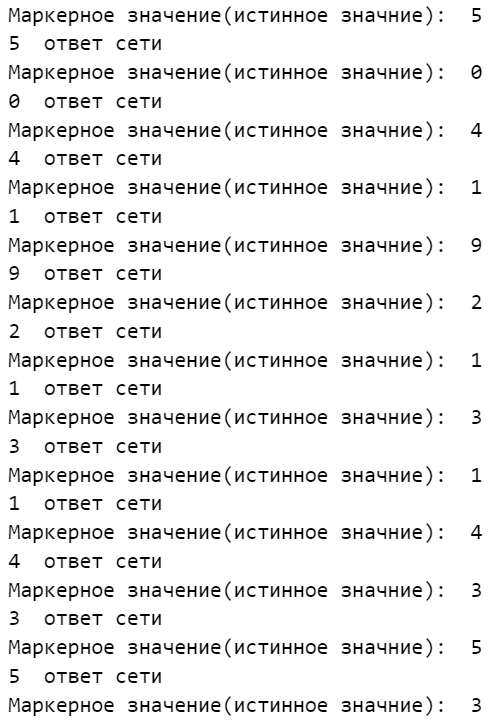

In [ ]:
scorecard_array = np.asarray(scorecard)
print("Эффективность НС = ", scorecard_array.sum() / scorecard_array.size) # при learning rate 0.3

Эффективность НС =  0.9524666666666667


In [20]:
scorecard_array = np.asarray(scorecard)
print("Эффективность НС = ", scorecard_array.sum() / scorecard_array.size) # при learning rate 0.2

Эффективность НС =  0.95435


In [23]:
# тренировка нейронной сети 
# переменная epochs указывает, сколько раз тренировочный набор данных используется для тренировки сети
epochs = 2
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(",")   
        inputs = (np.asarray(all_values[1:], dtype=np.float64) / 255.0 * 0.99) + 0.01 #масштабируем и смещаем входные значения
        # создать целевые выходные значения (все равны 0.01, за исключением желаемого маркерного значения - 0.00)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] - целевое маркерное значение для данной записи 
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

In [ ]:
# ДЛЯ ДВУХ ЭПОХ
scorecard_array = np.asarray(scorecard)
print("Эффективность НС = ", scorecard_array.sum() / scorecard_array.size) # при learning rate 0.2

Эффективность НС =  0.9698
